선형 회귀 2주차 이어 실습

In [2]:
import torch
from torch import nn
from torch import optim

x = torch.FloatTensor(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
     [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
     [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)

y = torch.FloatTensor(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
     [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
     [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10000):
  output = model(x)
  cost = criterion(output, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if (epoch + 1) % 1000 == 0:
    print(f'Epoch : {epoch+1:4d}, model : {list(model.parameters())}, Cost : {cost:.3f}')


Epoch : 1000, model : [Parameter containing:
tensor([[0.8885]], requires_grad=True), Parameter containing:
tensor([-0.6307], requires_grad=True)], Cost : 1.381
Epoch : 2000, model : [Parameter containing:
tensor([[0.8849]], requires_grad=True), Parameter containing:
tensor([-0.5571], requires_grad=True)], Cost : 1.376
Epoch : 3000, model : [Parameter containing:
tensor([[0.8826]], requires_grad=True), Parameter containing:
tensor([-0.5113], requires_grad=True)], Cost : 1.374
Epoch : 4000, model : [Parameter containing:
tensor([[0.8812]], requires_grad=True), Parameter containing:
tensor([-0.4829], requires_grad=True)], Cost : 1.373
Epoch : 5000, model : [Parameter containing:
tensor([[0.8803]], requires_grad=True), Parameter containing:
tensor([-0.4651], requires_grad=True)], Cost : 1.372
Epoch : 6000, model : [Parameter containing:
tensor([[0.8798]], requires_grad=True), Parameter containing:
tensor([-0.4541], requires_grad=True)], Cost : 1.372
Epoch : 7000, model : [Parameter contain

위의 x,y 에 대한 결과 값을 matplotlib 이용해서 그래프로 시각화 -> 못함...

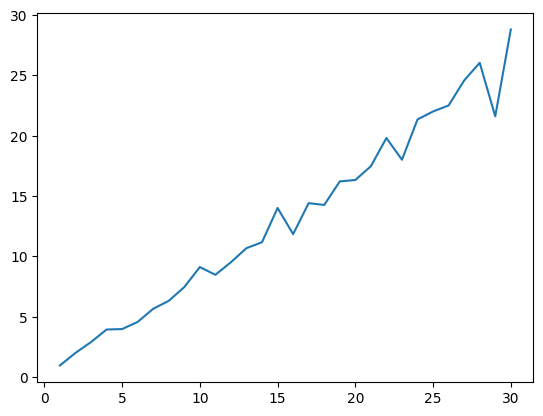

In [3]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

데이터로더 실습

In [6]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

train_x = torch.FloatTensor([
    [1,2],[2,3],[3,4],[4,5],[5,6],[6,7]
])

train_y = torch.FloatTensor([
    [0.1,1.5],[1,2.8],[1.9,4.1],[2.8,5.4],[3.7,6.7],[4.6,8]
])

train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


for epoch in range(20000):
  cost = 0.0


  for batch in train_dataloader:
    x,y = batch
    output=model(x)

    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost / len(train_dataloader)

  if (epoch + 1) % 1000 == 0:
    print(f'Epoch: {epoch+1:4d}, Model: {list(model.parameters())}, Cost: {cost:.3f}')

Epoch: 1000, Model: [Parameter containing:
tensor([[0.6094, 0.0591],
        [0.6096, 0.5960]], requires_grad=True), Parameter containing:
tensor([0.1155, 0.0017], requires_grad=True)], Cost: 0.109
Epoch: 2000, Model: [Parameter containing:
tensor([[ 0.8445, -0.0623],
        [ 0.7055,  0.5464]], requires_grad=True), Parameter containing:
tensor([-0.2410, -0.1438], requires_grad=True)], Cost: 0.028
Epoch: 3000, Model: [Parameter containing:
tensor([[ 0.9642, -0.1243],
        [ 0.7544,  0.5211]], requires_grad=True), Parameter containing:
tensor([-0.4227, -0.2179], requires_grad=True)], Cost: 0.007
Epoch: 4000, Model: [Parameter containing:
tensor([[ 1.0253, -0.1558],
        [ 0.7793,  0.5083]], requires_grad=True), Parameter containing:
tensor([-0.5153, -0.2557], requires_grad=True)], Cost: 0.002
Epoch: 5000, Model: [Parameter containing:
tensor([[ 1.0563, -0.1719],
        [ 0.7919,  0.5017]], requires_grad=True), Parameter containing:
tensor([-0.5624, -0.2749], requires_grad=True)]

비선형 회귀 실습

In [15]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x = df.iloc[:, 0].values
    self.y = df.iloc[:, 0].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
    y = torch.FloatTensor([self.y[index]])
    return x, y

  def __len__(self):
    return self.length

class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(2, 1)

  def forward(self, x):
    x = self.layer(x)
    return x


train_dataset = CustomDataset('/content/drive/MyDrive/cbnu/datasets/03/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

for epoch in range(10000):
  cost = 0.0

  for x, y in train_dataloader:
    x = x.to(device)
    y = x.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost / len(train_dataloader)

  if(epoch + 1) % 1000 == 0:
    print(f'Epoch: {epoch+1:4d}, Model: {list(model.parameters())}, Cost: {cost:.3f}')


with torch.no_grad():
  model.eval()
  inputs = torch.FloatTensor(
      [
          [1 ** 2, 1],
          [5 ** 2, 5],
          [11 ** 2, 11]
      ]
  ).to(device)
  outputs = model(inputs)
  print(outputs)

torch.save(model, '/content/drive/MyDrive/cbnu/results/03/model.pt')

torch.save(model.state_dict(), '/content/drive/MyDrive/cbnu/results/03/model_state_dict.pt')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1000, Model: [Parameter containing:
tensor([[0.4928, 0.4990]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4398], device='cuda:0', requires_grad=True)], Cost: 575.364
Epoch: 2000, Model: [Parameter containing:
tensor([[0.4933, 0.4995]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4024], device='cuda:0', requires_grad=True)], Cost: 485.844
Epoch: 3000, Model: [Parameter containing:
tensor([[0.4939, 0.4996]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3682], device='cuda:0', requires_grad=True)], Cost: 519.151
Epoch: 4000, Model: [Parameter containing:
tensor([[0.4945, 0.4996]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3369], device='cuda:0', requires_grad=True)], Cost: 516.236
Epoch: 5000, Model: [Parameter containing:
tensor([[0.4949, 0.4998]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3082], device='cuda:0', requires_grad=True)], Cost: 497.826


체크포인트 저장

In [18]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x = df.iloc[:, 0].values
    self.y = df.iloc[:, 0].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
    y = torch.FloatTensor([self.y[index]])
    return x, y

  def __len__(self):
    return self.length

class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(2, 1)

  def forward(self, x):
    x = self.layer(x)
    return x


train_dataset = CustomDataset('/content/drive/MyDrive/cbnu/datasets/03/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)



checkpoint = 1
for epoch in range(10000):
  cost = 0.0

  for x, y in train_dataloader:
    x = x.to(device)
    y = x.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost / len(train_dataloader)

  if (epoch + 1) % 1000 == 0:
        torch.save(
            {
                "model": "CustomModel",
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "cost": cost,
                "description": f"CustomModel 체크포인트-{checkpoint}",
            },
            f"/content/drive/MyDrive/cbnu/results/03/checkpoint-{checkpoint}.pt",
        )
        checkpoint += 1


with torch.no_grad():
  model.eval()
  inputs = torch.FloatTensor(
      [
          [1 ** 2, 1],
          [5 ** 2, 5],
          [11 ** 2, 11]
      ]
  ).to(device)
  outputs = model(inputs)
  print(outputs)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[ 1.1715],
        [15.1029],
        [65.8303]], device='cuda:0')


체크포인트 불러오기

In [20]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x = df.iloc[:, 0].values
    self.y = df.iloc[:, 0].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
    y = torch.FloatTensor([self.y[index]])
    return x, y

  def __len__(self):
    return self.length

class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(2, 1)

  def forward(self, x):
    x = self.layer(x)
    return x


train_dataset = CustomDataset('/content/drive/MyDrive/cbnu/datasets/03/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)




checkpoint = torch.load("/content/drive/MyDrive/cbnu/results/03/checkpoint-6.pt")
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
checkpoint_epoch = checkpoint["epoch"]
checkpoint_description = checkpoint["description"]
print(checkpoint_description)

for epoch in range(checkpoint_epoch + 1, 10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

CustomModel 체크포인트-6
Epoch : 7000, Model : [Parameter containing:
tensor([[-0.0037,  0.9993]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.2207], device='cuda:0', requires_grad=True)], Cost : 0.022
Epoch : 8000, Model : [Parameter containing:
tensor([[-0.0034,  0.9998]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.2020], device='cuda:0', requires_grad=True)], Cost : 0.019
Epoch : 9000, Model : [Parameter containing:
tensor([[-0.0030,  0.9998]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.1848], device='cuda:0', requires_grad=True)], Cost : 0.014
Epoch : 10000, Model : [Parameter containing:
tensor([[-0.0028,  0.9998]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.1691], device='cuda:0', requires_grad=True)], Cost : 0.013
